# AutoPandas

<img src="logo_autopandas.png" alt="drawing" width="200"/>

<center><h2> Process, visualize and use data easily.</h2></center>

### Table of contents

* [1. Read data](#section1)
* [2. Processing](#section2)
* [3. Visualization](#section3)
* [4. Benchmark](#section4)
* [5. Comparison](#section5)
* [6. Generation](#section6)

In [1]:
import autopandas as apd
%reload_ext autoreload
%autoreload 2

<a id='section1'></a>

# 1. Read data

#### Easily load CSV, AutoML or pd.DataFrame.

apd.AutoData is a subclass of pd.DataFrame representing 2D data frames:
* Examples are in rows
* Features are in columns

You can load a dataset in CSV format by calling `read_csv` method. It should automatically detect the seperator.

In [3]:
input_file = 'autopandas/data/wine.csv' # wine, adult, diabetes, iris, mushrooms, seeds, squares1-2, titanic, boston
data = apd.read_csv(input_file)

You can also load some toy datasets from `datasets` module

In [2]:
data = apd.datasets.load_wine()

In [5]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


**Keys:**
* **Row**: train, valid, test, header
* **Column**: X, y, categorical, numerical

In [7]:
# show index entry for 'numerical'
data.indexes['numerical']

# try also: categorical, X, y, train, test, X_categorical, y_test, etc.

['residual sugar', 'total sulfur dioxide', 'density']

#### Get a subset of data

In [8]:
# calling the object itself is equivalent to calling "get_data" method
data('header')
#data('X_header')           # five first rows of X (examples without the class target)
#data('categorical_header') # five first rows of categorical variables
#data('numerical_header')   # five first rows of numerical variables
#data('y_test')             # test set of target
#data.get_data('y')         # the target variable

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


#### Set the target variable (class) if needed

You can set a continuous or categorical variable. AutoPandas will detect if it is a **classification or regression** problem.

You can also set a **list of targets**.

In [9]:
data.set_class('quality') 
#data.set_class(['age', 'fnlwgt']) #['income', 'gender'] # multiclass

#### Split data in train and test sets

When loading the data, train/test split is done.

You can re-do the train_test split with different parameters if needed.

In [7]:
# data.train_test_split(test_size=0.3) # already done automatically

_Remark: you can also define train/test sets by hand by calling the index_

data.indexes['train'] = [0, 1, 4, 5, 6] # indexes of train rows

### Descriptors

In [10]:
data.descriptors() # AutoPandas descriptors
# data.describe() # Pandas describe method

,task,shape,ratio,sparsity,class_deviation,categorical_ratio,missing_ratio,max_skewness,mean_skewness,min_skewness
0,classification,"(4898, 12)",0.00245,0.000323,0.885639,0.75,0.0,5.023331,1.205035,0.155796


<a id='section2'></a>

# 2. Processing


Parameters: **method** and **key** (targeted set).

**Missing values imputation**

Different methods available: mean, median, remove, most.

Imputation with a predictive model is currently being tested.

In [3]:
data = data.imputation() # mean, median, remove, most

**Encoding**

Various encodings are available: label, one_hot, likelihood, target, count and more.

In [4]:
data = data.encoding('label', 'categorical') # encode categorical variables
#data = data.encoding('one_hot', 'categorical',) # one_hot, likelihood, count, target, etc.

#data.encoding('drop', 'numerical') # simply drop numerical columns

**Normalization**

Min-max or standard normalizations.

In [5]:
data = data.normalization('standard', 'numerical') # min-max, standard
#data2 = data.normalization('min-max', 'numerical')

In [17]:
data.min(axis=0)

fixed acidity           0.000000
volatile acidity        0.000000
citric acid             0.000000
residual sugar         -1.137952
chlorides               0.000000
free sulfur dioxide     0.000000
total sulfur dioxide   -3.071440
density                -2.305332
pH                      0.000000
sulphates               0.000000
alcohol                 0.000000
quality                 0.000000
dtype: float64

#### Synthetic Data Vault

Apply encoding and decoding processing method from the paper "Synthetic Data Vault" by Neha Patki, Roy Wedge and Kalyan Veeramachanemi.

In [14]:
# encode
sdv_data, limits, min_max = apd.sdv.encode(data)
# do something
new_data = sdv_data
# decode
data = apd.sdv.decode(new_data, data, limits, min_max)

**Dimensionality reduction**

Dimensionality reduction methods: PCA, LDA, T-SNE, random projection, feature_hashing.

In [15]:
#data = data.reduction()
data.reduction(method='hashing')('header') # pca, lda, tsne, feature_hashing

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,21.0,0.122328,-107.0,-24.0,-53.251194,73.0,0.0,-0.231197
1,0.0,0.0,28.0,-0.064640,-14.0,-35.0,-91.528835,16.0,0.0,1.000778
2,0.0,0.0,17.0,0.706603,-21.0,-27.0,-99.448201,31.0,0.0,-0.485414
3,0.0,0.0,25.0,1.174023,-21.0,-23.0,-78.673307,44.0,0.0,0.179461
4,0.0,0.0,8.0,1.431104,-34.0,-28.0,-98.520437,134.0,0.0,0.003464


<a id='section3'></a>

# 3. Visualization

#### Class distribution

y set plot


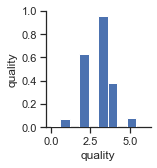

In [19]:
data.plot('y') # alias data('y').plot()

#### 2D PCA plot

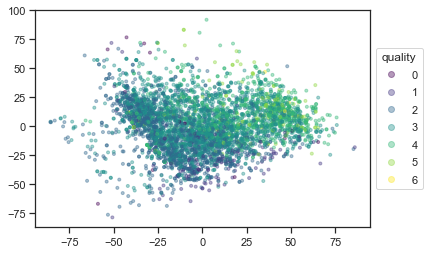

In [20]:
# for class coloration: c=data.get_data('y')
# class is used for coloration by default but the dimensionality reduction erased the class column
data.pca(n_components=2).plot(c=data.get_data('y'))

#### T-SNE

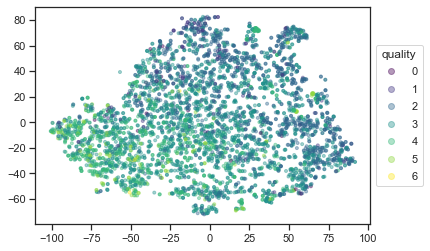

In [21]:
data.tsne().plot(c=data.get_data('y'))

#### Linear Discriminant Analysis

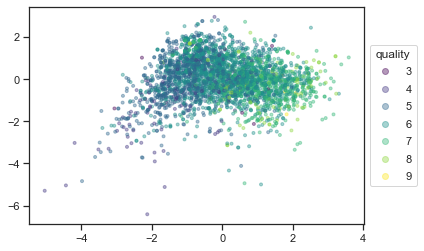

In [37]:
data('train').lda(n_components=2).plot(c=data('y_train'))

#### Heatmap

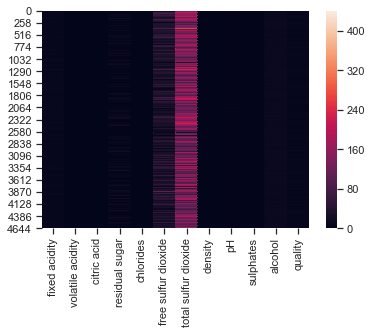

In [38]:
data.plot() # alias data.heatmap()

#### Correlation matrix plot

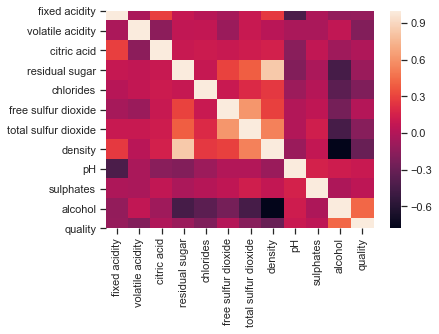

In [39]:
data.corr().plot() # alias data.correlation()

#### Features pairplot

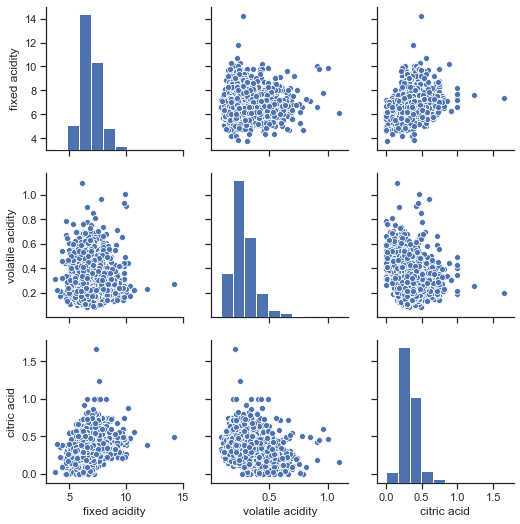

In [40]:
data[data.columns[:3]].pairplot() # max_features is set to 12 by default

#### Features boxplot

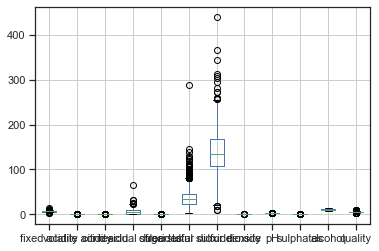

In [41]:
data.boxplot()

<a id='section4'></a>

# 4. Benchmark

#### Compute a model's score on the task

By default, the method naturally train model on train set and test it on test set.

In [56]:
#data.set_class('income')
data.score()

1.0

In [22]:
# mean and variance on several runs
data.score_error_bars()

(0.673927842069435, 4.0223155098725256e-05)

In [37]:
# score on another target
#data.set_class('pH')
#data.score()

#### Compute score with custom model and scoring function

In [57]:
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression

data.score(model=LogisticRegression(), metric=f1_score)

0.9495017187731164

#### Call auto-sklearn

In [40]:
# data.score(method='automatic')

<a id='section5'></a>

# 5. Comparison

#### Two similar datasets (subsets of the same distribution)

In [15]:
ad1 = apd.read_csv('autopandas/data/squares1.csv') # CSV separator is infered automatically
ad2 = apd.read_csv('autopandas/data/squares2.csv')

### 3 types of distances:

#### 1) Between points/columns
* L0, Euclidean and more
* Kolmogorov-Smirnof, Jensen-Shannon, Mutual information

#### 2) Between distributions (datasets)

#### Default: nn_discrepancy

In [35]:
ad1.distance(ad2)

0.026799842170199373

#### Nearest Neihbors Adversarial Accuracy

In [46]:
ad1[:300].distance(ad2[:300], method='nnaa')

0.28

* Euclidean?
* MMD?
* etc.

#### Adversarial score / Binary classification / Discriminant / Classifier score / Discrepancy metric

In [36]:
print(ad1.distance(ad2, method='discriminant')) # or 'discrepancy'

from sklearn.neural_network import MLPClassifier
model = MLPClassifier(hidden_layer_sizes=(20, 20))
print(ad1.distance(ad2, method='discriminant', model=model))

0.5356410256410257
0.5087179487179487


#### Task score / Utility
Some possible parameters: model, metric.

In [37]:
ad1.set_class('0.0.29')
ad2.set_class('0.0.29')
print(ad1.score(verbose=True)) # Trained on ad1 and tested on ad1 (with split)
print(ad2.score()) # Trained on ad2 and tested on ad2 (with split)
print(ad1.score(test=ad2)) # Trained on ad1 and tested on ad2
print(ad2.score(test=ad1)) # Trained on ad2 and tested on ad1

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1172
         1.0       1.00      1.00      1.00       759
         5.0       1.00      1.00      1.00       169

   micro avg       1.00      1.00      1.00      2100
   macro avg       1.00      1.00      1.00      2100
weighted avg       1.00      1.00      1.00      2100

Metric: <function accuracy_score at 0x7fbbf1a37b70>
0.9995238095238095
0.9994444444444445
0.998999833305551
0.9992856122303186


### Overlay plot

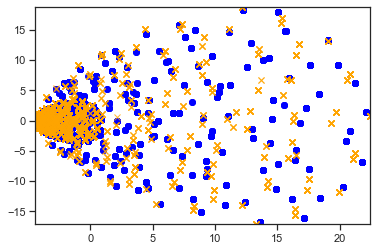

In [38]:
pca1 = ad1.pca(n_components=2)
pca2 = ad2.pca(n_components=2)
pca1.plot(ad=pca2) # alias ad.plot(pca1, pca2)

### Marginal plots

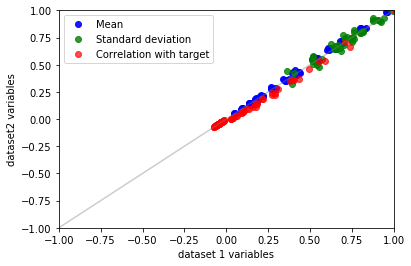

In [25]:
ad1.compare_marginals(ad2, method='all', target='0.0') # if no target, it uses the defined class

<a id='section6'></a>

# 6. Generation

#### Copy

In [14]:
gen = apd.generators.Copycat()
gen.fit(data)
gen.sample(n=5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
3703,37,42,32,-0.983504,21,35,0.523382,-0.819786,18,19,31,2
1412,19,38,29,2.498187,40,41,0.825882,1.664201,37,27,7,2
3911,37,109,10,1.272787,33,55,1.756652,1.106371,33,27,8,2
562,42,66,36,-0.283276,26,38,-0.872774,-0.668843,36,34,77,4
2632,34,44,50,1.331140,45,88,1.314537,1.365598,24,24,9,2


In [15]:
gendata = gen.sample(data.shape[0])
data.distance(gendata)

0

#### Additive Noise Model

In [20]:
gen = apd.generators.ANM() # use 'model' parameter to use custom model for imputation
gen.fit(data)
gen.sample(n=5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,44,36,38,-0.321982,42,49,0.808092,-0.348268,45,18,59,2
1,52,87,30,0.273116,15,13,-1.578761,-0.359423,17,13,65,2
2,28,7,36,-0.851174,28,53,-0.199376,-0.489019,30,44,24,4
3,23,50,27,-0.734868,13,47,0.323189,-0.977216,58,37,67,4
4,14,17,23,-0.686407,28,8,-0.733711,-0.529374,51,27,22,2


In [21]:
# p is the probability of replacing original data
# If p is small a lot of data is copied and nnaa can be under 0.5
generated = gen.sample(n=500, p=0.1)
print(data[:500].distance(generated, method='nnaa'))

generated = gen.sample(n=500, p=1)
print(data[:500].distance(generated, method='nnaa'))

0.45799999999999996
0.477


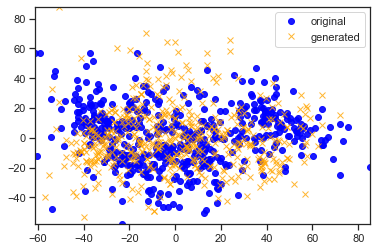

In [25]:
pca_data_1, pca_model = data.pca(n_components=2, return_param=True)
pca_data_1 = pca_data_1[:500]
pca_data_2 = gen.sample(n=500).pca(model=pca_model)
pca1.plot(ad=pca2, names=['original', 'generated'])

#### Copula

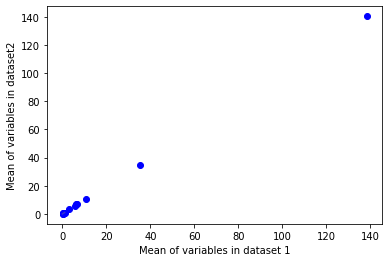

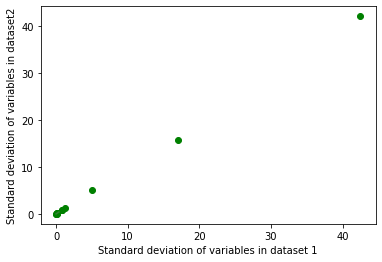

In [6]:
gen = apd.generators.Copula() # use 'model' parameter to use custom model generation (between copula tricks)
gen.fit(data)
data.compare_marginals(gen.sample(n=500), method='mean')
data.compare_marginals(gen.sample(n=500), method='std')

In [ ]:
# Also: 
# - VAE (apd.generators.VAE)
# - GMM (apd.generators.GMM)
# - KDE (apd.generators.KDE)

#### Artificial data

In [3]:
gen = apd.generators.Artificial()
gen.sample(n=5)

,0_X,1,0_y
0,0.997526,-0.505521,1
1,0.985818,-0.008223,0
2,-0.001982,0.499028,1
3,2.002942,0.497073,1
4,-1.007215,-0.014210,0


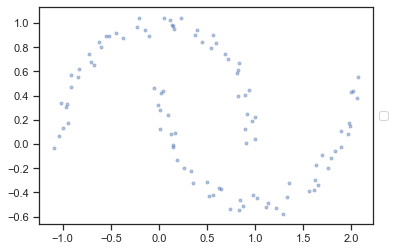

In [7]:
gen.sample(n=100, noise=0.05).get_data('X').plot()

In [8]:
gen = apd.generators.Artificial(method='blobs')
gen.sample(n=5)

,0_X,1,0_y
0,-2.519648,3.636578,1
1,-2.840472,2.072427,1
2,-8.392442,7.926996,2
3,9.113111,6.036909,0
4,9.924669,4.478660,0


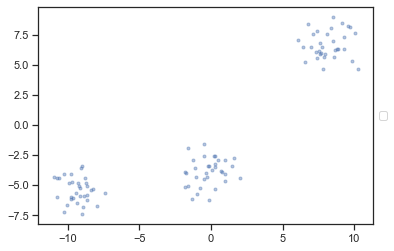

In [9]:
gen.sample(n=100).get_data('X').plot()